# Jordan O'Donovan - x19372016

In [ ]:
# Importing modules necessary for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# Setting so that every column of a DataFrame will be shown when displayed
pd.set_option('display.max_columns', None)

In [ ]:
# First I will open the two data text files.
# Next I will remove the comma from two names so that Pandas can import it correctly.
# Following this I will write the two text files into one

In [ ]:
# Open the file for reading
with open('jan_data_uncleaned.txt', 'r') as f:
    lines = f.readlines()

# Find the index of the line you want to keep
keep_index = -1
for i, line in enumerate(lines):
    if "2023-01-01" in line:
        keep_index = i
        break

# Write the remaining contents of the file back to the file
with open('jan_data.txt', 'w') as f:
    for line in lines[keep_index:]:
        f.write(line)

In [ ]:
# Open the file for reading
with open('feb_data_uncleaned.txt', 'r') as f:
    lines = f.readlines()

# Find the index of the line you want to keep
keep_index = -1
for i, line in enumerate(lines):
    if "2023-02-01" in line:
        keep_index = i
        break

# Write the remaining contents of the file back to the file
with open('feb_data.txt', 'w') as f:
    for line in lines[keep_index:]:
        f.write(line)

In [ ]:
# Read in the file
with open('second_data.txt', 'r') as file :
    filedata = file.read()

with open('first_data.txt', 'r') as file :
    filedata2 = file.read()
    
with open('jordan_dataset_feb.txt', 'r') as file :
    filedata3 = file.read()
    
with open('jan_data.txt', 'r') as file :
    filedata4 = file.read()

with open('jordan_dataset_mar.txt', 'r') as file :
    filedata5 = file.read()

with open('jordan_dataset_apr.txt', 'r') as file :
    filedata6 = file.read()
    
# Replace the target string
filedata5 = filedata5.replace('Africa,', 'Africa')
filedata5 = filedata5.replace('APAC,', 'APAC')
filedata5 = filedata5.replace('LATAM,', 'LATAM')
filedata = filedata.replace('WZA96271,', 'WZA96271')
filedata3 = filedata3.replace('WZA96271,', 'WZA96271')
filedata3 = filedata3.replace('Procurement,', 'Procurement')
filedata3 = filedata3.replace('Services,', 'Services')
filedata3 = filedata3.replace('Germany,', 'Germany')
filedata3 = filedata3.replace('Denmark,', 'Denmark')
filedata3 = filedata3.replace('Africa,APAC,LATAM,NA', 'Africa APAC LATAM NA')
filedata3 = filedata3.replace('EE,', 'EE')
filedata3 = filedata3.replace('WE,', 'WE')
filedata3 = filedata3.replace('MENA,', 'MENA')
filedata3 = filedata3.replace('HR,', 'HR')
filedata5 = filedata5.replace('HR,', 'HR')
filedata = filedata.replace('York,', 'York')
filedata2 = filedata2.replace('York,', 'York')
filedata4 = filedata4.replace('WZA96271,', 'WZA96271')
filedata4 = filedata4.replace('EE,', 'EE')
filedata5 = filedata5.replace('EE,', 'EE')
filedata5 = filedata5.replace('EEWE,', 'EEWE')
filedata5 = filedata5.replace('EEMENA,', 'EEMENA')
filedata4 = filedata4.replace('WE,', 'WE')
filedata4 = filedata4.replace('MENA,', 'MENA')
filedata4 = filedata4.replace('Procurement,', 'Procurement')
filedata4 = filedata4.replace('Services,', 'Services')
filedata4 = filedata4.replace('COV3001,', 'COV3001')
filedata5 = filedata5.replace('UK,', 'UK')
filedata5 = filedata5.replace('WZA96271,', 'WZA96271')
filedata6 = filedata6.replace('WZA96271,', 'WZA96271')
filedata6 = filedata6.replace('COV3001,', 'COV3001')
filedata5 = filedata5.replace('COV3001,', 'COV3001')


# Write the file out again
with open('second_data.txt', 'w') as file:
    file.write(filedata)
with open('first_data.txt', 'w') as file:
    file.write(filedata2)
with open('jordan_dataset_feb.txt', 'w') as file:
    file.write(filedata3)
with open('jan_data.txt', 'w') as file:
    file.write(filedata4)
with open('jordan_dataset_mar.txt', 'w') as file:
    file.write(filedata5)
with open('jordan_dataset_apr.txt', 'w') as file:
    file.write(filedata6)

with open('combined.txt', 'w') as file:
    file.write(filedata2)
    file.write(filedata)
    file.write(filedata3)
    file.write(filedata4)
    file.write(filedata5)
    file.write(filedata6)

In [ ]:
# Opening the new file
file = open('combined.txt')

In [ ]:
# Using Regex to change/remove characters so that it can be opened correctly as a DataFrame
fixed_lines = []
for line in file:
    line = re.sub(r'^.*?"STATE":\[\{', '', line)
    line = re.sub(r'\}\]\}"', '', line)
    line = re.sub(r'\:(?=\d)', '~', line)
    line = re.sub(r'\}\]', '', line)
    line = re.sub(r'(?<=\w):', '~', line)
    #line = [line]
    fixed_lines.append(line)

In [ ]:
# Using a dictionary to separate rows from columns
x = 0
df_dict = {}
for i in range(0,len(fixed_lines)):
    #print(fixed_lines[i])
    x += 1
    print(x)
    keyvals = fixed_lines[i].strip().split(",")
    for keyval in keyvals:
        if x == 96948:
          print(keyval)
        key, val = keyval.split(":")
        if not key in df_dict:
                df_dict[key] = [val]
        else:
                df_dict[key].append(val)

In [ ]:
# Turning the dictionary into a DataFrame
df = pd.DataFrame.from_dict(df_dict)

In [ ]:
# Cleaning the DataFrame
df.columns = [column[1:-1] for column in df.columns]
df = df.replace('"', '', regex=True)
df = df.replace('~', ':', regex=True)
df = df.replace('null', np.nan)
df.head()

In [ ]:
# Saving DataFrame as a CSV so that these steps don't have to be repeated
df.to_csv('combined.csv', index=None)

In [ ]:
df.shape

(122668, 110)

In [ ]:
df = pd.read_csv('combined.csv')

<ipython-input-172-8363ef2e27dd>:1: DtypeWarning: Columns (24,25,79,80,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined.csv')


In [ ]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

<ipython-input-173-d652372fe603>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr().abs()


<ipython-input-175-7c6251a1c23f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(corrdf.corr(), vmin=-1, vmax=1, annot=True)


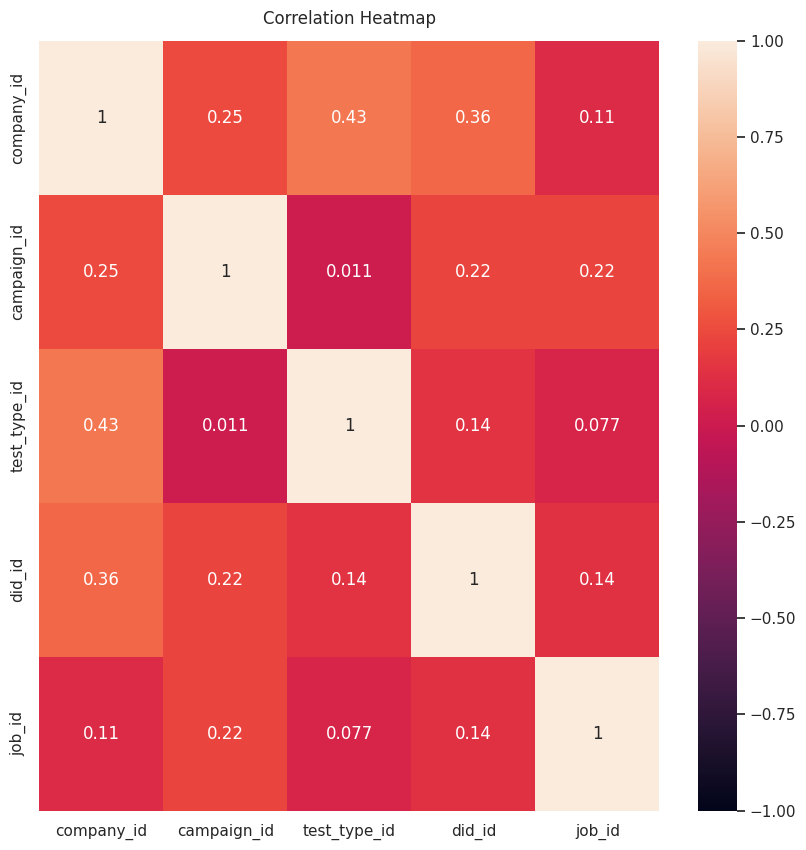

In [ ]:
corrdf = df[['action', 'company_id', 'number_type', 'campaign_id', 'test_type_id', 'did_id', 'job_id']]

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corrdf.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

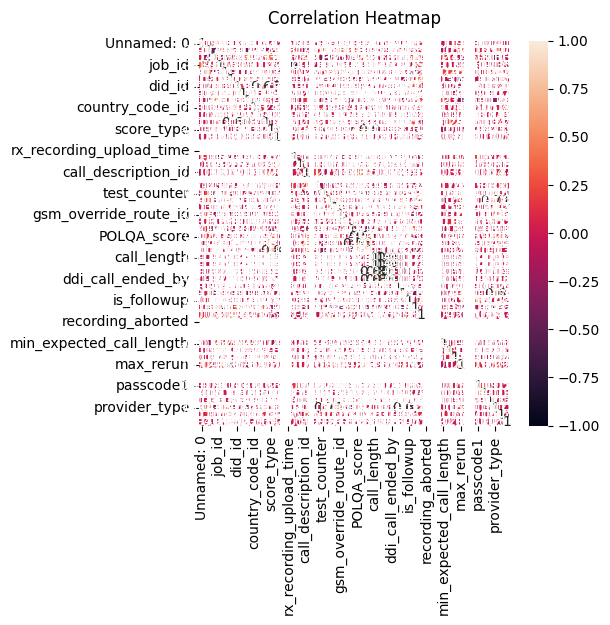

In [ ]:
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(numdf.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
df.isna().sum()

id                    0
test_type_id          0
test_type             0
job_id                5
server_name           0
                  ...  
passcode1         95743
passcode2        119919
passcode3        122183
provider_type     30234
action                0
Length: 110, dtype: int64

In [ ]:
# Fixing column datatypes and reducing memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122668 entries, 0 to 122667
Columns: 110 entries, id to action
dtypes: float64(44), int64(6), object(60)
memory usage: 102.9+ MB


In [ ]:
df["id"] = df['id'].astype('int64')
df["test_type_id"] = df['test_type_id'].astype('int64')
df["job_id"] = pd.to_numeric(df['job_id'], errors='coerce')
df['number_id'] = pd.to_numeric(df['number_id'], errors='coerce')
df["did_id"] = pd.to_numeric(df['did_id'], errors='coerce')
df["Dial_Out"] = pd.to_numeric(df['Dial_Out'], errors='coerce')
df['processing_complete'] = df['processing_complete'].astype('bool')
df['company_id'] = df['company_id'].astype('int64')
df['country_code_id'] = df['country_code_id'].astype('int64')
df["source_country_code_id"] = pd.to_numeric(df['source_country_code_id'], errors='coerce')
df["out_country"] = pd.to_numeric(df['out_country'], errors='coerce')
df["score_type"] = pd.to_numeric(df['score_type'], errors='coerce')
df["phone_group"] = pd.to_numeric(df['phone_group'], errors='coerce')
df["created_on"] = pd.to_datetime(df['created_on'])
df["updated_on"] = pd.to_datetime(df['updated_on'], errors='coerce')
df["call_start_time"] = pd.to_datetime(df['call_start_time'], errors='coerce')
df["call_connect_time"] = pd.to_datetime(df['call_connect_time'], errors='coerce')
df["call_end_time"] = pd.to_datetime(df['call_end_time'], errors='coerce')
df["recording_upload_time"] = pd.to_datetime(df['recording_upload_time'], errors='coerce')
df["outbound_call_start_time"] = pd.to_datetime(df['outbound_call_start_time'], errors='coerce')
df["recording_upload_time"] = pd.to_datetime(df['recording_upload_time'], errors='coerce')
df["outbound_call_connect_time"] = pd.to_datetime(df['outbound_call_connect_time'], errors='coerce')
df["outbound_call_end_time"] = pd.to_datetime(df['outbound_call_end_time'], errors='coerce')
df["email_received_time"] = pd.to_datetime(df['email_received_time'], errors='coerce')
df["playing_upload_time"] = pd.to_datetime(df['playing_upload_time'], errors='coerce')
df["full_recording_upload_time"] = pd.to_datetime(df['full_recording_upload_time'], errors='coerce')
df["rx_recording_upload_time"] = pd.to_datetime(df['rx_recording_upload_time'], errors='coerce')
df["play_polqa_process_time"] = pd.to_datetime(df['play_polqa_process_time'], errors='coerce')
df["ddi_call_connect_time"] = pd.to_datetime(df['ddi_call_connect_time'], errors='coerce')
df["ddi_call_end_time"] = pd.to_datetime(df['ddi_call_end_time'], errors='coerce')
df["duration"] = pd.to_datetime(df['duration'], format='%M:%S', errors='coerce')
df["campaign_style"] = pd.to_numeric(df['campaign_style'], errors='coerce')
df["ddi_duration"] = pd.to_datetime(df['ddi_duration'], format='%M:%S', errors='coerce')
df["show"] = pd.to_numeric(df['show'], errors='coerce')
df["call_description_id"] = pd.to_numeric(df['call_description_id'], errors='coerce')
df["added_by_id"] = pd.to_numeric(df['added_by_id'], errors='coerce')
df["test_counter"] = pd.to_numeric(df['test_counter'], errors='coerce')
df["route_id"] = pd.to_numeric(df['route_id'], errors='coerce')
df["override_route_id"] = pd.to_numeric(df['override_route_id'], errors='coerce')
df["gsm_override_route_id"] = pd.to_numeric(df['gsm_override_route_id'], errors='coerce')
df["PESQ_score"] = pd.to_numeric(df['PESQ_score'], errors='coerce')
df["pesq_server_id"] = pd.to_numeric(df['pesq_server_id'], errors='coerce')
df["pesq_process_time"] = pd.to_datetime(df['pesq_process_time'], errors='coerce')
df["pesq_server_id"] = pd.to_numeric(df['pesq_server_id'], errors='coerce')
df["POLQA_score"] = pd.to_numeric(df['POLQA_score'], errors='coerce')
df["POLQA_play_score"] = pd.to_numeric(df['POLQA_play_score'], errors='coerce')
df["polqa_server_id"] = pd.to_numeric(df['polqa_server_id'], errors='coerce')
df["polqa_process_time"] = pd.to_datetime(df['polqa_process_time'], errors='coerce')
df["call_length"] = pd.to_numeric(df['call_length'], errors='coerce')
df["silence"] = pd.to_numeric(df['silence'], errors='coerce')
df["call_ended_by"] = pd.to_numeric(df['call_ended_by'], errors='coerce')
df["ddi_call_ended_by"] = pd.to_numeric(df['ddi_call_ended_by'], errors='coerce')
df['invalid_recording'] = df['invalid_recording'].astype('bool')
df["approve"] = pd.to_numeric(df['approve'], errors='coerce')
df["is_gsm"] = pd.to_numeric(df['is_gsm'], errors='coerce')
df["is_followup"] = pd.to_numeric(df['is_followup'], errors='coerce')
df["application_id"] = pd.to_numeric(df['application_id'], errors='coerce')
df["is_gsm"] = pd.to_numeric(df['is_gsm'], errors='coerce')
df["agent_confirmation_time"] = pd.to_datetime(df['agent_confirmation_time'], errors='coerce')
df["agent_duration"] = pd.to_datetime(df['agent_duration'], format='%M:%S', errors='coerce')
df["campaign_id"] = pd.to_numeric(df['campaign_id'], errors='coerce')
df["min_expected_call_length"] = pd.to_numeric(df['min_expected_call_length'], errors='coerce')
df["groupid"] = pd.to_numeric(df['groupid'], errors='coerce')
df["api_call_time"] = pd.to_datetime(df['api_call_time'], errors='coerce')
df["received_cli"] = pd.to_numeric(df['received_cli'], errors='coerce')
df['hide_route'] = df['hide_route'].astype('bool')
df["max_rerun"] = pd.to_numeric(df['max_rerun'], errors='coerce')
df['x'] = df['x'].astype('bool')
df['play_x'] = df['play_x'].astype('bool')
df['testfail'] = df['testfail'].astype('bool')
df['testbusy'] = df['testbusy'].astype('bool')
df['testold'] = df['testold'].astype('bool')
df['ddi_issue'] = df['ddi_issue'].astype('bool')
df["proc_time"] = pd.to_datetime(df['proc_time'], errors='coerce')
df['low_score'] = df['low_score'].astype('bool')
df['ddi_provider_issue'] = df['ddi_provider_issue'].astype('bool')
df["passcode1"] = pd.to_numeric(df['passcode1'], errors='coerce')
df["passcode2"] = pd.to_numeric(df['passcode2'], errors='coerce')
df["passcode3"] = pd.to_numeric(df['passcode3'], errors='coerce')


In [ ]:
# Memory usage reduced by 9.1%
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122668 entries, 0 to 122667
Columns: 110 entries, id to action
dtypes: bool(11), datetime64[ns](24), float64(43), int64(6), object(26)
memory usage: 93.9+ MB


In [ ]:
# Before cleaning
# float64(44), int64(6), object(60)
dtypes = {}
dtypes['Float'] = 44
dtypes['Integer'] = 6
dtypes['Object'] = 60

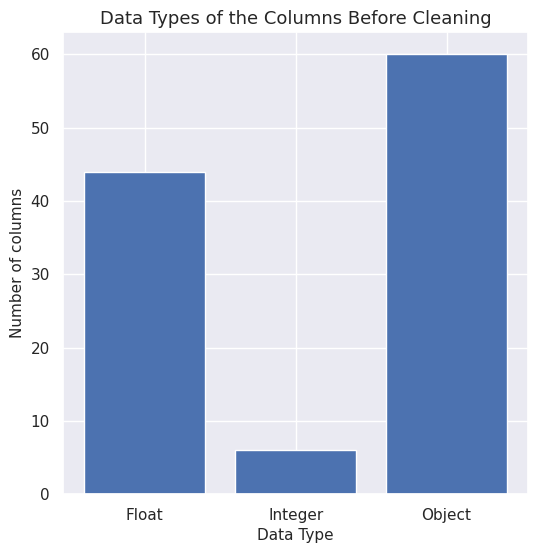

In [ ]:
# Graph displaying the number of data types
sns.set(rc={'figure.figsize':(6,6)})
plt.bar(range(len(dtypes)), list(dtypes.values()), align='center')
plt.xticks(range(len(dtypes)), list(dtypes.keys()))
plt.title('Data Types of the Columns Before Cleaning', size=13)
plt.xlabel('Data Type', size=11)
plt.ylabel('Number of columns', size=11)

plt.show()

In [ ]:
dtypes = {}
dtypes['Boolean'] = 11
dtypes['DateTime'] = 24
dtypes['Float'] = 43
dtypes['Integer'] = 6
dtypes['Object'] = 26

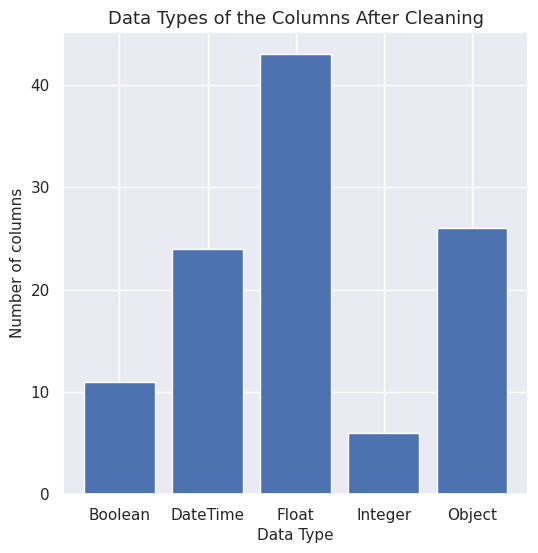

In [ ]:
# Graph displaying the number of data types
sns.set(rc={'figure.figsize':(6,6)})
plt.bar(range(len(dtypes)), list(dtypes.values()), align='center')
plt.xticks(range(len(dtypes)), list(dtypes.keys()))
plt.title('Data Types of the Columns After Cleaning', size=13)
plt.xlabel('Data Type', size=11)
plt.ylabel('Number of columns', size=11)

plt.show()

In [ ]:
df.isna().sum()

id                    0
test_type_id          0
test_type             0
job_id                5
server_name           0
                  ...  
passcode1         95743
passcode2        119919
passcode3        122183
provider_type     30234
action                0
Length: 110, dtype: int64

In [ ]:
# Creating a DataFrame containing the percentage of missing values per column
percent_missing = df.isnull().sum() * 100 / len(df)

In [ ]:
df[df['created_on'].isna()]

,Unnamed: 0,id,test_type_id,test_type,job_id,server_name,number_type_id,number_type,number_id,did_id,...,low_score,speakeasy_low_score,ddi_provider_issue,passcode1,passcode2,passcode3,provider_type,action,labels,fail_reason_id
83111,83111,1290898,82,In Country Inbound Two Way Voice Assure SIP Link,9480833.0,chl-scl1-p1-redcol,1,Toll,178831.0,NaN,...,True,NaN,True,NaN,NaN,NaN,1.0,CHECK CALL HISTORY,1,29


In [ ]:
1/122000

8.19672131147541e-06

In [ ]:
percent_missing.sort_values(ascending=True)[:30]

id                     0.000000
country_code           0.000000
country_name           0.000000
test_counter           0.000000
invalid_recording      0.000000
application_id         0.000000
hide_route             0.000000
country_code_id        0.000000
x                      0.000000
testfail               0.000000
testbusy               0.000000
testold                0.000000
ddi_issue              0.000000
low_score              0.000000
ddi_provider_issue     0.000000
play_x                 0.000000
company_name           0.000000
action                 0.000000
company_id             0.000000
test_type_id           0.000000
processing_complete    0.000000
test_type              0.000000
server_name            0.000000
server_ip              0.000000
number                 0.000000
created_on             0.000815
job_id                 0.004076
number_id              0.004076
campaign_id            0.004076
campaign_style         0.004076
dtype: float64

In [ ]:
# Only 30 of the 111 columns have no missing values
percent_missing.sort_values(ascending=True)[30:50]

number_type               0.435321
show                      0.611406
cli                       6.614602
updated_on               16.108521
score_type               21.847589
call_start_time          23.301921
provider_type            24.647015
route_id                 24.647015
call_end_time            25.879610
pesq_server_id           45.307660
carrier                  47.529918
added_by                 56.586885
description              56.944761
call_description_id      56.944761
fail_reason              60.949066
call_connect_time        64.963968
duration                 65.625917
max_rerun                66.640852
channel                  70.953305
gsm_override_route_id    71.560635
dtype: float64

In [ ]:
percent_missing.sort_values(ascending=True)[100:]

agent_duration               99.974729
hide                        100.000000
recording_aborted           100.000000
number_type_id              100.000000
speakeasy_low_score         100.000000
email_received_time         100.000000
rx_recording_upload_time    100.000000
added_by_id                 100.000000
tone_processed_on           100.000000
playing_aborted             100.000000
dtype: float64

In [ ]:
%matplotlib inline  

In [ ]:
tmap

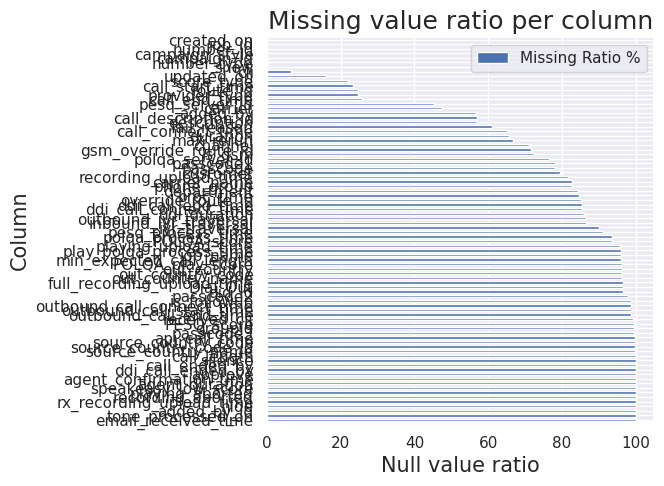

In [ ]:
# Graph displaying the percentage of missing values per column
sns.set(rc={'figure.figsize':(5,5)})
if df.isnull().sum().sum() != 0:
    na_df = (df.isnull().sum() / len(df)) * 100      
    na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
    missing_data.plot(kind = "barh")
plt.title("Missing value ratio per column", size=18)
plt.xlabel('Null value ratio', size=15)
plt.ylabel('Column', size=15)
plt.show()

In [ ]:
# Number of time the most common ID's appear
df.id.value_counts().head(20)

15870349    27
2625345     26
15883508    20
3609287     17
21197295    17
694041      17
22531417    17
25340908    16
60155750    16
15895298    16
3921797     16
3823433     16
3330811     16
15895299    16
59410393    15
15890105    14
3964646     14
16511501    14
15891424    14
3533077     14
Name: id, dtype: int64

In [ ]:
df.invalid_recording.value_counts()

True    122668
Name: invalid_recording, dtype: int64

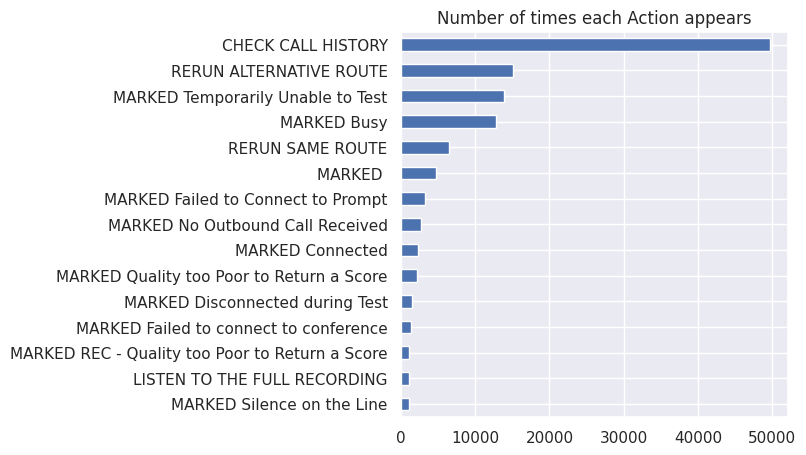

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
df.action.value_counts(ascending=True).tail(15).plot(kind='barh')
plt.title('Number of times each Action appears')
plt.show()

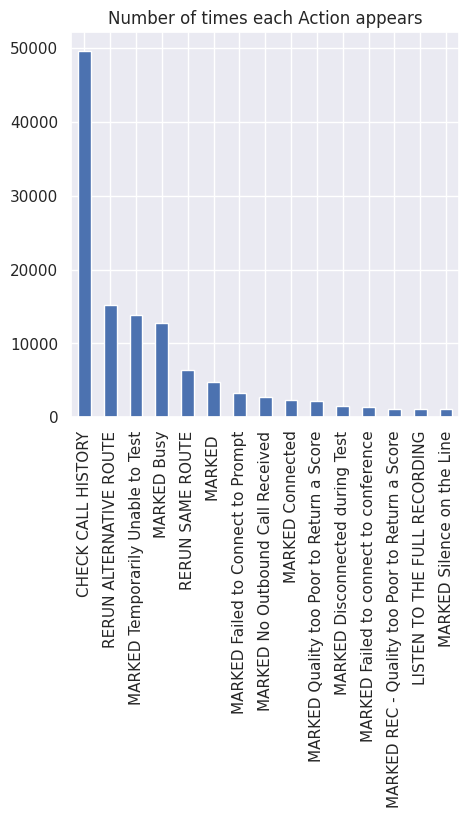

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
df.action.value_counts().head(15).plot(kind='bar')
plt.title('Number of times each Action appears')
plt.show()

In [ ]:
df.action.value_counts()#/df.shape[0]

CHECK CALL HISTORY                          49662
RERUN ALTERNATIVE ROUTE                     15135
MARKED Temporarily Unable to Test           13838
MARKED Busy                                 12753
RERUN SAME ROUTE                             6424
                                            ...  
MARKED Could not be connected to meeting        1
MARKED Failed To Connect Echo Server            1
MARKED Loss of Audio                            1
MARKED Silence on Inbound Call                  1
MARKED No Fax Detected                          1
Name: action, Length: 79, dtype: int64

In [ ]:
df.action.nunique()

79

In [ ]:
# Percentage of each Action
df.action.value_counts().head(9)/df.shape[0]

CHECK CALL HISTORY                    0.404849
RERUN ALTERNATIVE ROUTE               0.123382
MARKED Temporarily Unable to Test     0.112809
MARKED Busy                           0.103964
RERUN SAME ROUTE                      0.052369
MARKED                                0.039016
MARKED Failed to Connect to Prompt    0.026576
MARKED No Outbound Call Received      0.022581
MARKED Connected                      0.018750
Name: action, dtype: float64

In [ ]:
df.shape

(122668, 110)

In [ ]:
df.call_connect_time.isna().sum()

79690

In [ ]:
df[df['call_connect_time'].isna()].action.value_counts()/df[df['call_connect_time'].isna()].shape[0]

CHECK CALL HISTORY                                  0.404467
RERUN ALTERNATIVE ROUTE                             0.183649
MARKED Busy                                         0.158979
MARKED Temporarily Unable to Test                   0.133317
RERUN SAME ROUTE                                    0.074978
MARKED                                              0.039478
MARKED Unpublished                                  0.003539
MARKED Number not in Service                        0.000991
MARKED No Passcode for Phone Group                  0.000213
MARKED Restricted Number Format - Unable to Test    0.000100
MARKED Incorrect IVR Traversal set                  0.000088
LISTEN TO THE FULL RECORDING                        0.000063
MARKED Dial In Busy                                 0.000050
MARKED Wrong Number Format                          0.000038
MARKED Disconnected during Test                     0.000025
DIAL NUMBER                                         0.000013
MARKED No Outbound Call 

<ipython-input-8-4b92a6587dd4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(corrdf.corr(), vmin=-1, vmax=1, annot=True)


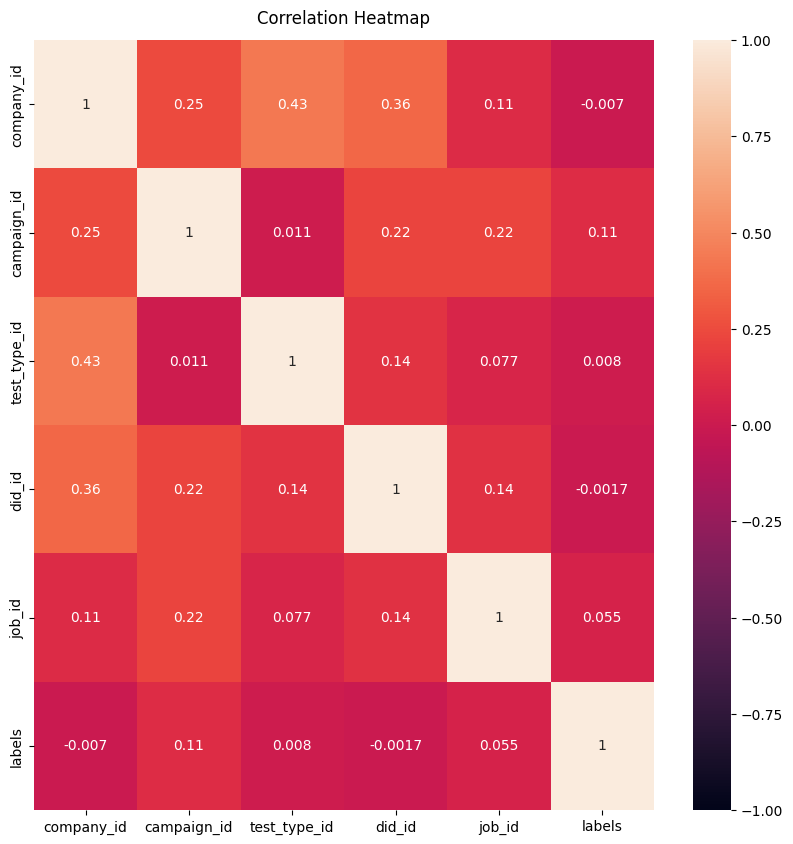

In [ ]:
corrdf = df[['action', 'company_id', 'number_type', 'campaign_id', 'test_type_id', 'did_id', 'job_id', 'labels']]

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corrdf.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

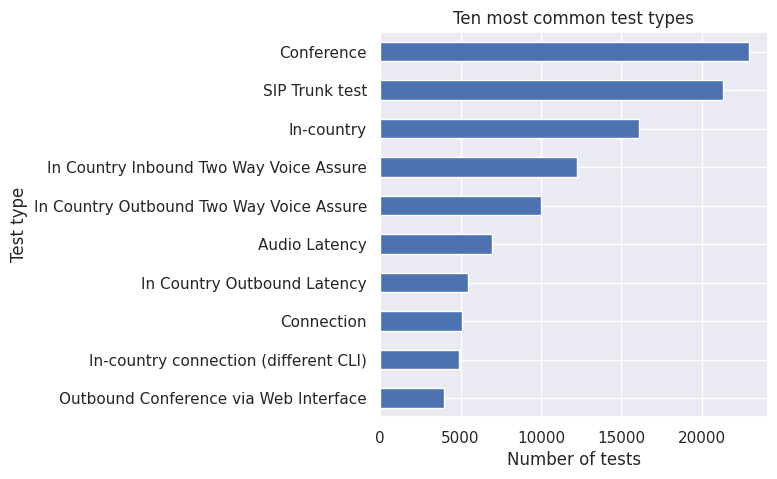

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
df.test_type.value_counts(ascending=True).tail(10).plot(kind='barh')
plt.title("Ten most common test types")
plt.xlabel('Number of tests')
plt.ylabel('Test type')
plt.show()

In [ ]:
# Percentage of each test type
df.test_type.value_counts().head(9)/df.shape[0]

Conference                                  0.187001
SIP Trunk test                              0.173525
In-country                                  0.131265
In Country Inbound Two Way Voice Assure     0.099545
In Country Outbound Two Way Voice Assure    0.081684
Audio Latency                               0.056828
In Country Outbound Latency                 0.044608
Connection                                  0.041388
In-country connection (different CLI)       0.039847
Name: test_type, dtype: float64

In [ ]:
df.test_type_id.nunique()

42

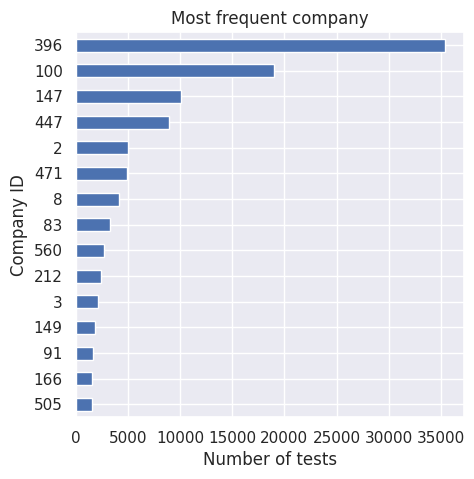

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
df.company_id.value_counts(ascending=True).tail(15).plot(kind='barh')
plt.title("Most frequent company")
plt.xlabel('Number of tests')
plt.ylabel('Company ID')
plt.show()

In [ ]:
# Percentage of each test type
df.company_id.value_counts().head(9)/df.shape[0]

396    0.288722
100    0.155126
147    0.082124
447    0.072651
2      0.040410
471    0.039847
8      0.033570
83     0.026421
560    0.021750
Name: company_id, dtype: float64

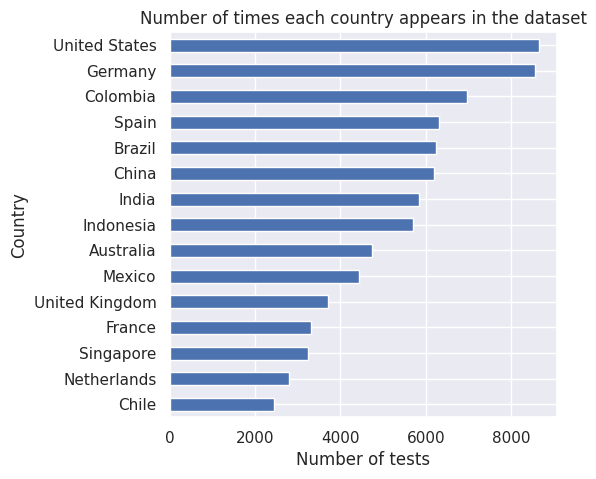

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
df.country_name.value_counts(ascending=True).tail(15).plot(kind='barh')
plt.title("Number of times each country appears in the dataset")
plt.xlabel('Number of tests')
plt.ylabel('Country')
plt.show()

In [ ]:
# Percentage of each test type
df.country_name.value_counts().head(9)/df.shape[0]

United States    0.070475
Germany          0.069831
Colombia         0.056861
Spain            0.051505
Brazil           0.050959
China            0.050510
India            0.047584
Indonesia        0.046434
Australia        0.038584
Name: country_name, dtype: float64

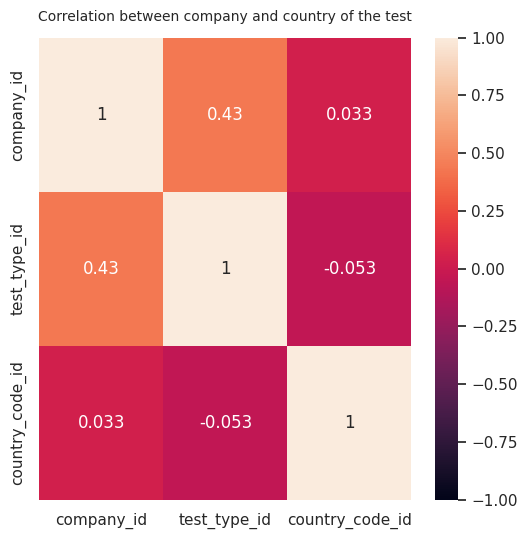

In [ ]:
corrdf = df[['company_id', 'test_type_id', 'country_code_id']]

plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(corrdf.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation between company and country of the test', fontdict={'fontsize':10}, pad=12);

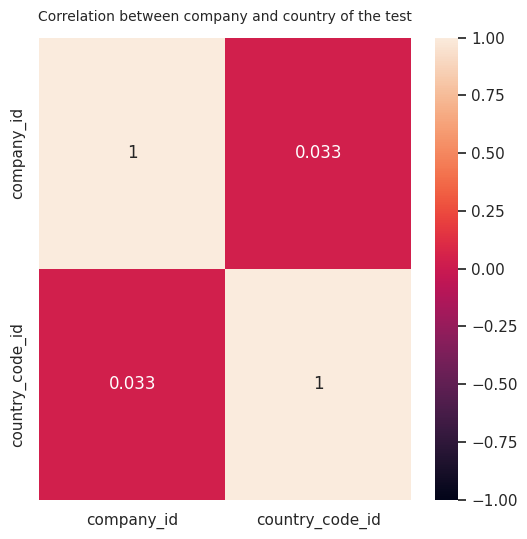

In [ ]:
corrdf = df[['company_id', 'test_type_id', 'country_code_id']]

plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(corrdf.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation between company and country of the test', fontdict={'fontsize':10}, pad=12);

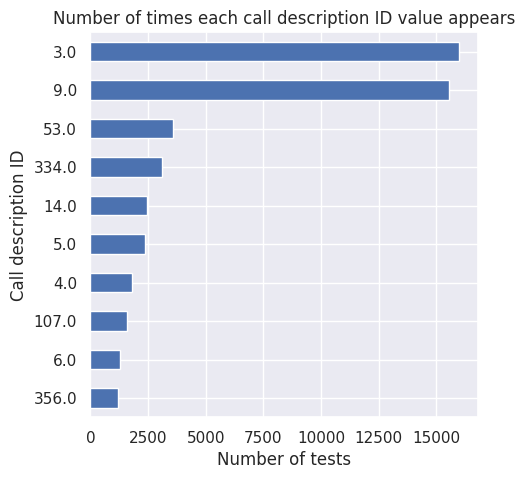

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
df.call_description_id.value_counts(ascending=True).tail(10).head(15).plot(kind='barh')
plt.title("Number of times each call description ID value appears")
plt.xlabel('Number of tests')
plt.ylabel('Call description ID')
plt.show()

In [ ]:
df.call_description_id.isna().sum()/df.shape[0]

0.5694476146998402

In [ ]:
# Percentage of each call description ID for total dataset
df.call_description_id.value_counts().head(9)/df.shape[0]

3.0      0.130401
9.0      0.126871
53.0     0.029201
334.0    0.025369
14.0     0.020152
5.0      0.019369
4.0      0.014584
107.0    0.012807
6.0      0.010345
Name: call_description_id, dtype: float64

In [ ]:
# Percentage of each call description ID when NULL rows removed
df.call_description_id.value_counts().head(9)/df[df['call_description_id'].notnull()].shape[0]

3.0      0.302869
9.0      0.294670
53.0     0.067822
334.0    0.058923
14.0     0.046805
5.0      0.044987
4.0      0.033873
107.0    0.029745
6.0      0.024027
Name: call_description_id, dtype: float64

In [ ]:
# A DataFrame containing only data where call_description_id was 9
cd9 = df[df['call_description_id']==9]

In [ ]:
cd9.action.value_counts(ascending=False)

MARKED Temporarily Unable to Test    13838
CHECK CALL HISTORY                    1698
LISTEN TO THE FULL RECORDING            20
LISTEN TO DEGRADED RECORDING             4
RERUN SAME ROUTE                         2
RERUN ALTERNATIVE ROUTE                  1
Name: action, dtype: int64

In [ ]:
cd9.action.value_counts(ascending=False)/cd9.shape[0]

MARKED Temporarily Unable to Test    0.889160
CHECK CALL HISTORY                   0.109105
LISTEN TO THE FULL RECORDING         0.001285
LISTEN TO DEGRADED RECORDING         0.000257
RERUN SAME ROUTE                     0.000129
RERUN ALTERNATIVE ROUTE              0.000064
Name: action, dtype: float64

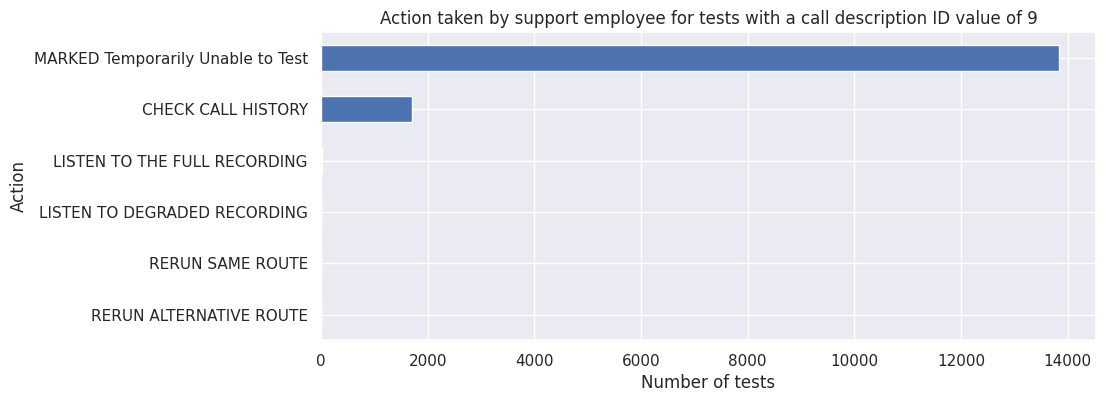

In [ ]:
plt.figure(figsize=(10,4))


ax = cd9.action.value_counts(ascending=True).plot(kind='barh')
plt.title("Action taken by support employee for tests with a call description ID value of 9")
plt.xlabel('Number of tests')
plt.ylabel('Action')
plt.show()

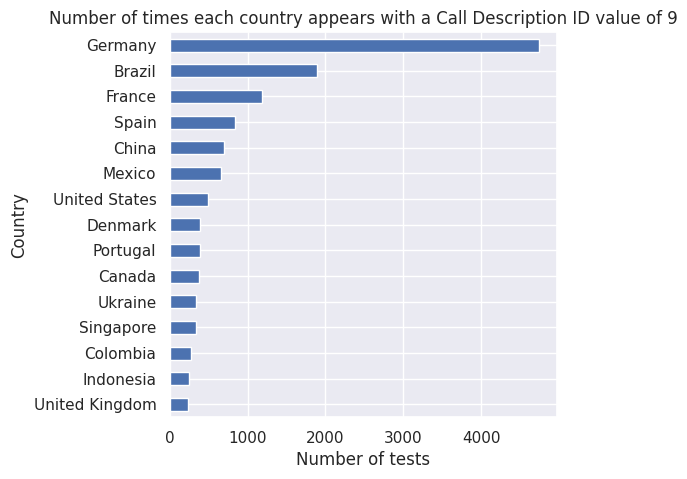

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
cd9.country_name.value_counts(ascending=True).tail(15).plot(kind='barh')
plt.title("Number of times each country appears with a Call Description ID value of 9")
plt.xlabel('Number of tests')
plt.ylabel('Country')
plt.show()

In [ ]:
cd9.country_name.value_counts(ascending=False).head(10)/cd9.shape[0]

Germany          0.304312
Brazil           0.121442
France           0.076399
Spain            0.053524
China            0.045107
Mexico           0.042023
United States    0.031485
Denmark          0.025252
Portugal         0.025124
Canada           0.023903
Name: country_name, dtype: float64

In [ ]:
cd3 = df[df['call_description_id']==3]

In [ ]:
cd3.action.value_counts(ascending=False)

MARKED Busy                     12753
CHECK CALL HISTORY               3239
RERUN ALTERNATIVE ROUTE             1
LISTEN TO DEGRADED RECORDING        1
LISTEN TO THE FULL RECORDING        1
DIAL NUMBER                         1
Name: action, dtype: int64

In [ ]:
cd3.action.value_counts(ascending=False)/cd3.shape[0]

MARKED Busy                     0.797262
CHECK CALL HISTORY              0.202488
RERUN ALTERNATIVE ROUTE         0.000063
LISTEN TO DEGRADED RECORDING    0.000063
LISTEN TO THE FULL RECORDING    0.000063
DIAL NUMBER                     0.000063
Name: action, dtype: float64

In [ ]:
cd3[cd3['action']=='MARKED Busy'].test_type.value_counts().head()

In-country                                 2644
In Country Inbound Two Way Voice Assure    1933
SIP Trunk test                             1772
Audio Latency                              1522
Conference                                 1347
Name: test_type, dtype: int64

In [ ]:
cd3[cd3['action']=='CHECK CALL HISTORY'].test_type.value_counts().head()

In-country                                 780
Connection                                 541
SIP Trunk test                             469
In Country Inbound Two Way Voice Assure    303
Audio Latency                              262
Name: test_type, dtype: int64

In [ ]:
cd3.test_type.value_counts().head()

In-country                                 3424
SIP Trunk test                             2242
In Country Inbound Two Way Voice Assure    2236
Audio Latency                              1784
Conference                                 1570
Name: test_type, dtype: int64

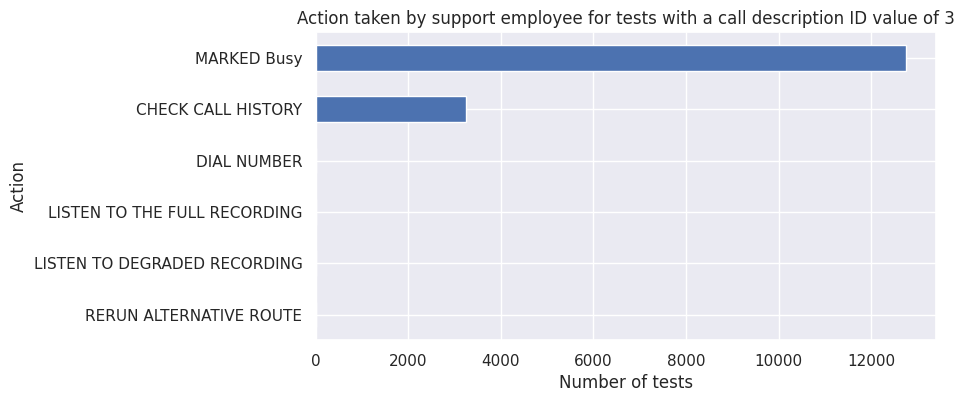

In [ ]:
plt.figure(figsize=(8,4))

ax = cd3.action.value_counts(ascending=True).plot(kind='barh')
plt.title("Action taken by support employee for tests with a call description ID value of 3")
plt.xlabel('Number of tests')
plt.ylabel('Action')
plt.show()

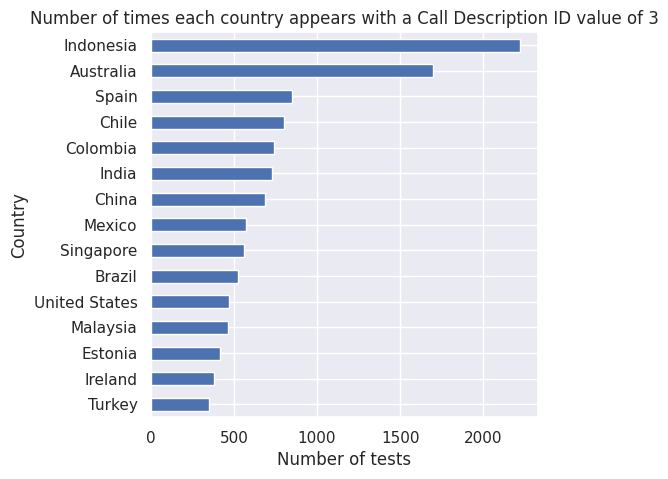

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
cd3.country_name.value_counts(ascending=True).tail(15).plot(kind='barh')
plt.title("Number of times each country appears with a Call Description ID value of 3")
plt.xlabel('Number of tests')
plt.ylabel('Country')
plt.show()

In [ ]:
cd3.country_name.value_counts(ascending=False).head(10)/cd3.shape[0]

Indonesia    0.138660
Australia    0.106089
Spain        0.052951
Chile        0.050013
Colombia     0.046199
India        0.045449
China        0.042823
Mexico       0.035946
Singapore    0.035134
Brazil       0.032883
Name: country_name, dtype: float64

In [ ]:
tutt = df[df['action']=='MARKED Temporarily Unable to Test']

tutt.call_description_id.value_counts()

9.0    13838
Name: call_description_id, dtype: int64

In [ ]:
busy = df[df['action']=='MARKED Busy']

busy.call_description_id.value_counts()

3.0    12753
Name: call_description_id, dtype: int64

In [ ]:
print(f"{(round((tutt.shape[0] + busy.shape[0]) / df.shape[0] * 100, 2))}% of the dataset")

21.68% of the dataset


In [ ]:
# Encoding the Actions as a new variable named Labels
labels = {}
x = 0
y = 0
for index, row in df.iterrows():
    
    if not df.action[x] in labels:
        labels[df.action[x]] = y
        y += 1
    x += 1
len(labels)

df['labels'] = df['action'].map(labels)

In [ ]:
df.fail_reason.value_counts()

SIP 503 Service Unavailable                                                       7185
SIP 480 Temporarily Unavailable                                                   6443
SIP 480 Temporarily unavailable                                                   4948
Rec: SIP 480 Temporarily unavailable                                              3322
SIP 486 Busy Here                                                                 3096
                                                                                  ... 
Rec: SIP 401 Unauthorized                                                            1
Rec: SIP 183 Session Progress - Play: SIP 480 Temporarily not available              1
Rec: PRI PRI_EVENT_HANGUP_REQ (17) - Play: SIP 100 Trying                            1
Rec: SIP 480 Temporarily not available - Play: SIP 480 Temporarily Unavailable       1
Rec: SIP 408 Request Timeout 020351914                                               1
Name: fail_reason, Length: 228, dtype: int6

In [ ]:
# Encoding the fail reasons as a new variable named fail reasons ID
fail_reasons = {}
x = 0
y = 0
for index, row in df.iterrows():
    
    if not df.fail_reason[x] in fail_reasons:
        fail_reasons[df.fail_reason[x]] = y
        y += 1
    x += 1
len(fail_reasons)

df['fail_reason_id'] = df['fail_reason'].map(fail_reasons)

In [ ]:
df.fail_reason_id.value_counts()

0      74765
1       7185
7       6443
13      4948
8       3322
       ...  
98         1
199        1
169        1
201        1
92         1
Name: fail_reason_id, Length: 229, dtype: int64

In [ ]:
df.number_type.value_counts()

Toll           68903
Toll Free      28678
SIP            23340
UIFN\/ITFS       832
Mobile Toll      380
Premium            1
Name: number_type, dtype: int64

In [ ]:
df.number_type_id.value_counts()

Series([], Name: number_type_id, dtype: int64)

In [ ]:
# Encoding Number Types as there was an issue capturing them through the log outputs
labels = {}
x = 0
y = 0
for index, row in df.iterrows():
    
    if not df.number_type[x] in labels:
        labels[df.number_type[x]] = y
        y += 1
    x += 1
len(labels)

df['number_type_id'] = df['number_type'].map(labels)

In [ ]:
df.number_type_id.value_counts()

1    68903
2    28678
0    23340
3      832
5      534
4      380
6        1
Name: number_type_id, dtype: int64

In [ ]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

<ipython-input-220-d652372fe603>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr().abs()


In [ ]:
pd.options.display.max_rows = 4000
s[3660:]

labels  id                          0.117196
        test_type_id                0.008045
        job_id                      0.055432
        number_type_id              0.136292
        number_id                   0.058197
        did_id                      0.001711
        Dial_Out                    0.011133
        processing_complete              NaN
        company_id                  0.007034
        country_code_id             0.085577
        source_country_code_id      0.142168
        out_country                 0.140785
        score_type                  0.045265
        phone_group                 0.007931
        campaign_style              0.050324
        show                             NaN
        call_description_id         0.229849
        added_by_id                      NaN
        added_by                    0.047714
        test_counter                0.124974
        route_id                    0.015526
        override_route_id           0.056604
        gs

In [ ]:
# labels .4 correlation with received_cli
# .575 with source_country_code_id
# .27 with call_description_id
# -.7 with PESQ_score

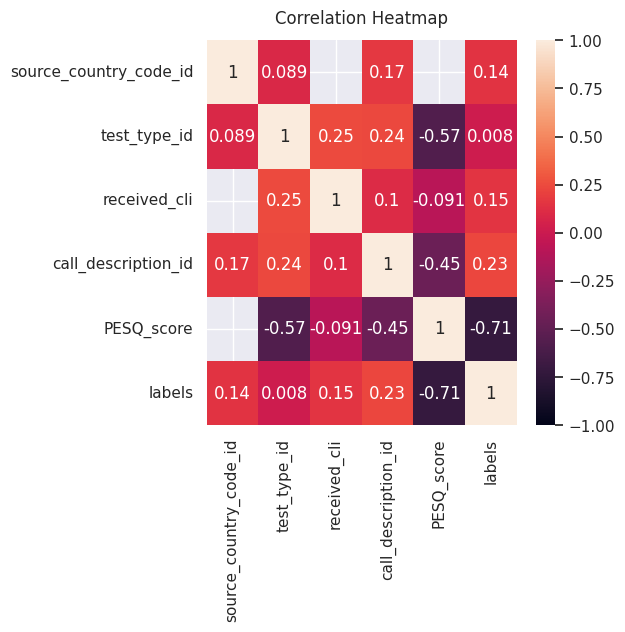

In [ ]:
corrdf = df[['source_country_code_id', 'test_type_id', 'received_cli', 'call_description_id', 'PESQ_score', 'labels']]

plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(corrdf.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
pd.options.display.max_rows = 60

In [ ]:
df.to_csv('combined_cleaned.csv')

In [ ]:
df = pd.read_csv('combined_cleaned.csv')

<ipython-input-4-2a92526eb29d>:1: DtypeWarning: Columns (21,22,76,77,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_cleaned.csv')


# Machine Learning

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from numpy import mean
from numpy import std

In [ ]:
# Creating a dataframe with only the numeric data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numdf = df.select_dtypes(include=numerics)

In [ ]:
numdf

,Unnamed: 0,id,test_type_id,job_id,number_type_id,number_id,did_id,Dial_Out,company_id,country_code_id,...,received_cli,max_rerun,hide,speakeasy_low_score,passcode1,passcode2,passcode3,provider_type,labels,fail_reason_id
0,0,3260670,63,8716252.0,0,94655.0,NaN,NaN,147,123,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1,3260771,63,8716320.0,0,106009.0,NaN,NaN,147,158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,2,3260773,63,8716322.0,0,106011.0,NaN,NaN,147,167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,3,22217016,4,8716332.0,1,72243.0,NaN,NaN,81,210,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,1,0
4,4,20528239,3,8716491.0,2,171765.0,NaN,NaN,173,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122663,122663,1403911,82,9911319.0,1,181669.0,NaN,NaN,396,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7,0
122664,122664,1403920,73,9911309.0,1,102026.0,NaN,NaN,396,161,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
122665,122665,61230984,68,9911330.0,2,195.0,NaN,NaN,2,43,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,8.0,1,7
122666,122666,61230984,68,9911330.0,2,195.0,NaN,NaN,2,43,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,8.0,8,0


In [ ]:
# Replacing the NaN data with 0's in the numeric data DataFrame
numdf = numdf.fillna(0)

In [ ]:
X = numdf.drop(['labels'], axis=1)
y = numdf['labels']

# Feature Importance

In [ ]:
scaler = StandardScaler().fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: 0, Score: 0.14120
Feature: 1, Score: 1.95947
Feature: 2, Score: -0.25404
Feature: 3, Score: -0.04577
Feature: 4, Score: 0.11042
Feature: 5, Score: 0.63694
Feature: 6, Score: 0.15393
Feature: 7, Score: 0.33926
Feature: 8, Score: -0.27981
Feature: 9, Score: -0.09282
Feature: 10, Score: 0.32643
Feature: 11, Score: -0.13697
Feature: 12, Score: 0.22019
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.20830
Feature: 16, Score: 0.04664
Feature: 17, Score: -0.58306
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.97170
Feature: 20, Score: -0.76523
Feature: 21, Score: -0.12648
Feature: 22, Score: 0.32380
Feature: 23, Score: 0.22342
Feature: 24, Score: 0.09097
Feature: 25, Score: -0.01103
Feature: 26, Score: -1.52118
Feature: 27, Score: -0.09089
Feature: 28, Score: 0.22996
Feature: 29, Score: -0.30222
Feature: 30, Score: -0.30222
Feature: 31, Score: -0.25801
Feature: 32, Score: -0.24991
Feature: 33, Score: -0.22528
Feature: 34, Score: 1.22037
Feature: 35, 

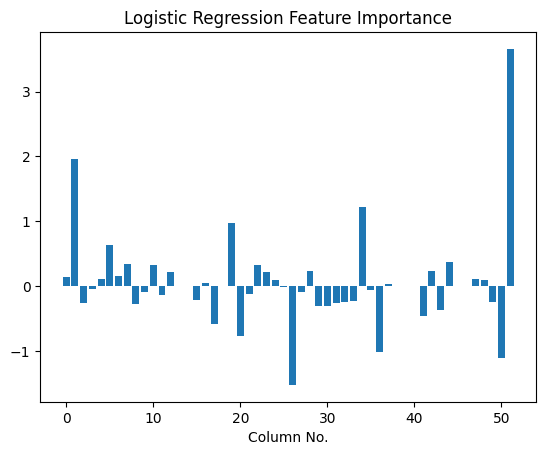

In [ ]:
# Logistic Regression Feature Importance
model = LogisticRegression()
XX = scaler.transform(X)
model.fit(XX, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Logistic Regression Feature Importance")
plt.xlabel('Column No.')
plt.show()

In [ ]:
df.show.value_counts()

1.0    121918
Name: show, dtype: int64

Feature: 0, Score: 0.07370
Feature: 1, Score: 0.00594
Feature: 2, Score: 0.06256
Feature: 3, Score: 0.04716
Feature: 4, Score: 0.02021
Feature: 5, Score: 0.00201
Feature: 6, Score: 0.00143
Feature: 7, Score: 0.00864
Feature: 8, Score: 0.01044
Feature: 9, Score: 0.00009
Feature: 10, Score: 0.00055
Feature: 11, Score: 0.00058
Feature: 12, Score: 0.00175
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.01693
Feature: 16, Score: 0.00012
Feature: 17, Score: 0.47942
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.02344
Feature: 20, Score: 0.07311
Feature: 21, Score: 0.01710
Feature: 22, Score: 0.00359
Feature: 23, Score: 0.00596
Feature: 24, Score: 0.00101
Feature: 25, Score: 0.00973
Feature: 26, Score: 0.00589
Feature: 27, Score: 0.00198
Feature: 28, Score: 0.00380
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00002
Feature: 32, Score: 0.00005
Feature: 33, Score: 0.00006
Feature: 34, Score: 0.00244
Feature: 35, Score: 0.00246
Fe

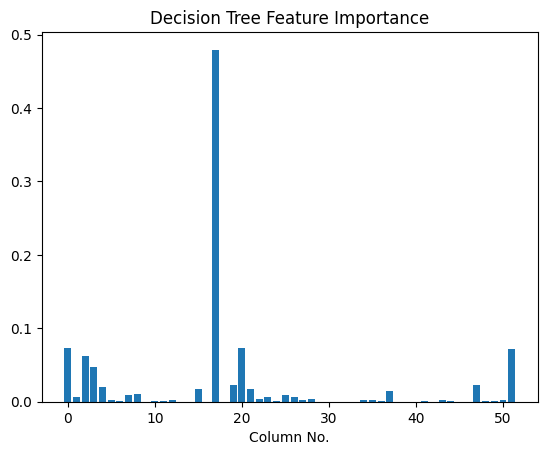

In [ ]:
# Decision Tree Feature Importance
model = DecisionTreeClassifier()
model.fit(X, y)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Decision Tree Feature Importance")
plt.xlabel('Column No.')
plt.show()

Feature: 0, Score: 0.09631
Feature: 1, Score: 0.02183
Feature: 2, Score: 0.07992
Feature: 3, Score: 0.01666
Feature: 4, Score: 0.03840
Feature: 5, Score: 0.00396
Feature: 6, Score: 0.00336
Feature: 7, Score: 0.02516
Feature: 8, Score: 0.02425
Feature: 9, Score: 0.00022
Feature: 10, Score: 0.00494
Feature: 11, Score: 0.00625
Feature: 12, Score: 0.00396
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00526
Feature: 16, Score: 0.00398
Feature: 17, Score: 0.20466
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.10867
Feature: 20, Score: 0.05389
Feature: 21, Score: 0.03292
Feature: 22, Score: 0.00621
Feature: 23, Score: 0.01231
Feature: 24, Score: 0.00140
Feature: 25, Score: 0.01670
Feature: 26, Score: 0.02366
Feature: 27, Score: 0.01076
Feature: 28, Score: 0.00770
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00003
Feature: 31, Score: 0.00008
Feature: 32, Score: 0.00004
Feature: 33, Score: 0.00010
Feature: 34, Score: 0.00430
Feature: 35, Score: 0.00247
Fe

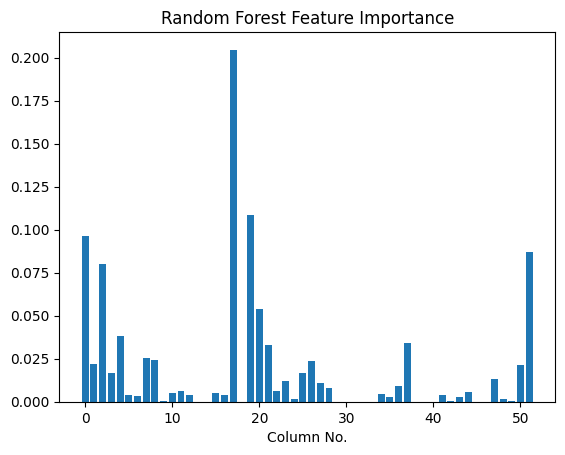

In [ ]:
# Random Forest Classifier Feature Importance
model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Random Forest Feature Importance")
plt.xlabel('Column No.')
plt.show()

Feature: 0, Score: 0.04518
Feature: 1, Score: 0.03157
Feature: 2, Score: 0.00309
Feature: 3, Score: 0.00738
Feature: 4, Score: 0.01335
Feature: 5, Score: 0.00111
Feature: 6, Score: 0.01112
Feature: 7, Score: 0.00573
Feature: 8, Score: 0.00175
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00120
Feature: 11, Score: 0.35034
Feature: 12, Score: 0.00222
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.06222
Feature: 16, Score: 0.00220
Feature: 17, Score: 0.00656
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.05577
Feature: 20, Score: 0.01144
Feature: 21, Score: 0.06118
Feature: 22, Score: 0.01103
Feature: 23, Score: 0.00170
Feature: 24, Score: 0.00047
Feature: 25, Score: 0.17398
Feature: 26, Score: 0.00272
Feature: 27, Score: 0.00093
Feature: 28, Score: 0.00089
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00227
Feature: 35, Score: 0.00020
Fe

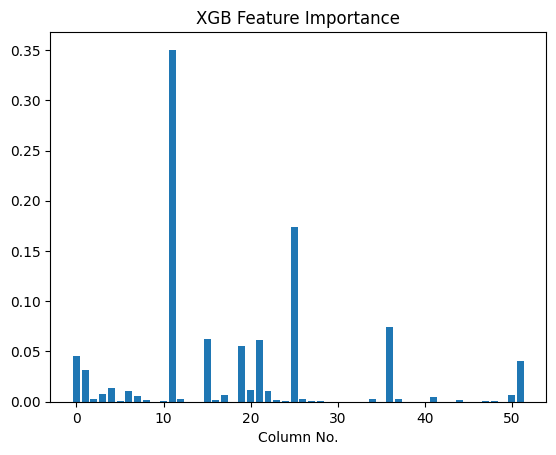

In [ ]:
# XGB Feature Importance
model = XGBClassifier()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("XGB Feature Importance")
plt.xlabel('Column No.')
plt.show()

In [ ]:
XX = numdf.iloc[::3, :].reset_index(drop=True)

In [ ]:
yy = XX['labels']
XX = XX.drop(['labels'], axis=1)

Feature: 0, Score: 0.35016
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.25894
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.14220
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.02664
Feature: 7, Score: 0.00011
Feature: 8, Score: 0.00012
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00192
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00041
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.07725
Feature: 20, Score: 0.00012
Feature: 21, Score: 0.00164
Feature: 22, Score: 0.00043
Feature: 23, Score: 0.00122
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: -0.00002
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
F

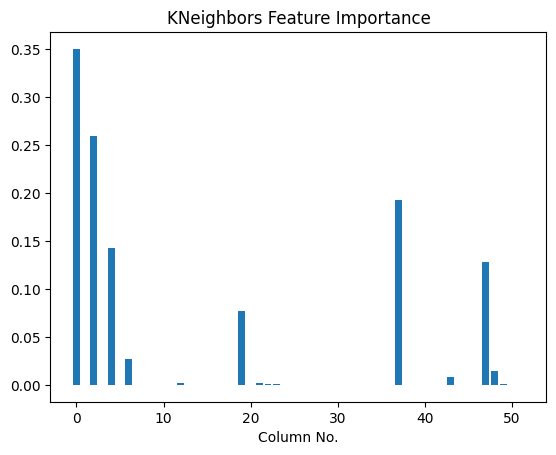

In [ ]:
# K Neighbors Feature Importance
model = KNeighborsClassifier()
# fit the model
model.fit(XX, yy)
# perform permutation importance
results = permutation_importance(model, XX, yy, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Column No.')
plt.title("KNeighbors Feature Importance")
plt.show()

In [ ]:
x = 0
for col in X.columns:
    print(f"{x}: {col}")
    x += 1

0: id
1: test_type_id
2: job_id
3: number_type_id
4: number_id
5: did_id
6: Dial_Out
7: company_id
8: country_code_id
9: source_country_code_id
10: out_country
11: score_type
12: phone_group
13: email_received_time
14: rx_recording_upload_time
15: campaign_style
16: show
17: call_description_id
18: added_by_id
19: added_by
20: test_counter
21: route_id
22: override_route_id
23: gsm_override_route_id
24: PESQ_score
25: pesq_server_id
26: POLQA_score
27: POLQA_play_score
28: polqa_server_id
29: call_length
30: silence
31: call_ended_by
32: ddi_call_ended_by
33: approve
34: is_gsm
35: is_followup
36: application_id
37: campaign_id
38: recording_aborted
39: playing_aborted
40: tone_processed_on
41: min_expected_call_length
42: groupid
43: received_cli
44: max_rerun
45: hide
46: speakeasy_low_score
47: passcode1
48: passcode2
49: passcode3
50: provider_type
51: fail_reason_id


In [ ]:
Z = numdf[['id', 'job_id', 'number_type_id', 'test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id']]

In [ ]:
y = numdf['labels']

In [ ]:
# evaluate random forest algorithm for classification
model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Z, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 0.746 (0.004)


In [ ]:
Z = numdf.drop(['labels'], axis=1)
y = numdf['labels']

# evaluate random forest algorithm for classification
model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Z, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 0.837 (0.003)


In [ ]:
Z = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id']]
y = numdf['labels']

# evaluate random forest algorithm for classification
model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Z, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 0.786 (0.003)


In [ ]:
Z = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id']]

In [ ]:
# evaluate random forest algorithm for classification
model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Z, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 0.786 (0.003)


In [ ]:
Z = numdf[['id', 'job_id', 'number_id', 'campaign_id', 'passcode1', 'passcode2']]

In [ ]:
# evaluate random forest algorithm for classification
model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Z, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Accuracy: 0.496 (0.004)


In [ ]:
dflabels = numdf[numdf['labels'].isin([1, 0, 7, 2, 8, 10, 11, 15, 26, 9, 3, 4, 5, 13])]

In [ ]:
Z = dflabels[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id']]
y = dflabels['labels']

In [ ]:
# evaluate random forest algorithm for classification
model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Z, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Accuracy: 0.781 (0.003)


In [ ]:
dflabels = numdf[numdf['labels'].isin([1, 0, 7, 2])]

In [ ]:
Z = dflabels[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id']]
y = dflabels['labels']

In [ ]:
# evaluate random forest algorithm for classification
model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Z, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.829 (0.003)


# Splitting the data

In [ ]:
Z = numdf.drop(['labels'], axis=1)
y = numdf['labels']

In [ ]:
eighty = round(df.shape[0]*.8)

Z_train = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id']].loc[:eighty]
y_train = numdf['labels'].loc[:eighty]

Z_test = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id']].loc[eighty:]
y_test = numdf['labels'].loc[eighty:]

In [ ]:
scaler = StandardScaler()
Z_train_scaled = scaler.fit_transform(Z_train)
Z_test_scaled = scaler.transform(Z_test)

In [ ]:
p_train = numdf.drop(['labels'], axis=1).loc[:eighty]
y_train = numdf['labels'].loc[:eighty]

p_test = numdf.drop(['labels'], axis=1).loc[eighty:]
y_test = numdf['labels'].loc[eighty:]

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

# Evaluate the model using cross-validation and print the mean and standard deviation of the accuracy scores
n_scores = cross_val_score(model, p_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(p_train, y_train)

y_pred = model.predict(p_test)
accuracy = model.score(p_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Cross-validation accuracy: 0.837 (0.001)
Test accuracy: 0.802029836145757
Precision: 0.7904672215046782
Recall: 0.802029836145757
F1 score: 0.7929853018184868


In [ ]:
p_train = numdf.drop(['labels'], axis=1).loc[:eighty]
y_train = numdf['labels'].loc[:eighty]

p_test = numdf.drop(['labels'], axis=1).loc[eighty:]
y_test = numdf['labels'].loc[eighty:]

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation and print the mean and standard deviation of the accuracy scores
n_scores = cross_val_score(model, p_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(p_train, y_train)

# Evaluate the model on the testing data and print the accuracy score
accuracy = model.score(p_test, y_test)
print('Test accuracy: %.3f' % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be cau

Cross-validation accuracy: 0.812 (0.003)
Test accuracy: 0.764


In [ ]:
p_train = numdf.drop(['labels'], axis=1).loc[:eighty]
y_train = numdf['labels'].loc[:eighty]

p_test = numdf.drop(['labels'], axis=1).loc[eighty:]
y_test = numdf['labels'].loc[eighty:]

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation and print the mean and standard deviation of the accuracy scores
n_scores = cross_val_score(model, p_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(p_train, y_train)

y_pred = model.predict(p_test)
accuracy = model.score(p_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation accuracy: 0.819 (0.003)
Test accuracy: 0.7429689410613842
Precision: 0.7559723293952884
Recall: 0.7429689410613842
F1 score: 0.7470555187858081


In [ ]:
p_train = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id']].loc[:eighty]
y_train = numdf['labels'].loc[:eighty]

p_test = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id']].loc[eighty:]
y_test = numdf['labels'].loc[eighty:]

# evaluate random forest algorithm for classification
model = RandomForestClassifier()

# Define the cross-validation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation and print the mean and standard deviation of the accuracy scores
n_scores = cross_val_score(model, p_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(p_train, y_train)

# Evaluate the model on the testing data and print the accuracy score
accuracy = model.score(p_test, y_test)
print('Test accuracy: %.3f' % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation accuracy: 0.788 (0.003)
Test accuracy: 0.736


In [ ]:
p_train = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id']].loc[:eighty]
y_train = numdf['labels'].loc[:eighty]

p_test = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id']].loc[eighty:]
y_test = numdf['labels'].loc[eighty:]

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation and print the mean and standard deviation of the accuracy scores
n_scores = cross_val_score(model, p_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(p_train, y_train)

accuracy = model.score(p_test, y_test)
print('Test accuracy: %.3f' % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation accuracy: 0.820 (0.003)
Test accuracy: 0.780


In [ ]:
p_train = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id', 'id']].loc[:eighty]
y_train = numdf['labels'].loc[:eighty]

p_test = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id', 'id']].loc[eighty:]
y_test = numdf['labels'].loc[eighty:]

# evaluate random forest algorithm for classification
model = RandomForestClassifier()

# Define the cross-validation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation and print the mean and standard deviation of the accuracy scores
n_scores = cross_val_score(model, p_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(p_train, y_train)

# Evaluate the model on the testing data and print the accuracy score
accuracy = model.score(p_test, y_test)
print('Test accuracy: %.3f' % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation accuracy: 0.792 (0.003)
Test accuracy: 0.729


In [ ]:
# evaluate random forest algorithm for classification
model = RandomForestClassifier()

# Define the cross-validation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation and print the mean and standard deviation of the accuracy scores
n_scores = cross_val_score(model, Z_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(Z_train, y_train)

y_pred = model.predict(Z_test)
accuracy = model.score(Z_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation accuracy: 0.820 (0.003)
Test accuracy: 0.7818129942121138
Precision: 0.7662719569374399
Recall: 0.7818129942121138
F1 score: 0.771037954015478


In [ ]:
# evaluate random forest algorithm for classification
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

# Define the cross-validation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

# Evaluate the model using cross-validation and print the mean and standard deviation of the accuracy scores
n_scores = cross_val_score(model, Z_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(Z_train, y_train)

# Evaluate the model on the testing data and print the accuracy score
accuracy = model.score(Z_test, y_test)
print('Test accuracy: %.3f' % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation accuracy: 0.459 (0.344)
Test accuracy: 0.510


# Hyperparameter Tuning


In [ ]:
# evaluate random forest algorithm for classification
model = RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=4,
                       min_samples_split=12, n_estimators=600)

# Define cross-validation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate model using cross-validation
n_scores = cross_val_score(model, Z_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(Z_train, y_train)

y_pred = model.predict(Z_test)
accuracy = model.score(Z_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation accuracy: 0.806 (0.003)
Test accuracy: 0.7834841444525964
Precision: 0.7531187545424457
Recall: 0.7834841444525964
F1 score: 0.762981933192855


In [ ]:
# evaluate random forest algorithm for classification
model = RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=4,
                       min_samples_split=12, n_estimators=600)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Z_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(Z_train, y_train)

y_pred = model.predict(Z_test)
accuracy = model.score(Z_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation accuracy: 0.806 (0.003)
Test accuracy: 0.7822205918317438
Precision: 0.7520351380847394
Recall: 0.7822205918317438
F1 score: 0.7618270743989952


In [ ]:
# define the classifier
clf = RandomForestClassifier()

# define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

# define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the grid search to the training data
grid_search.fit(Z_train, y_train)

# get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# predict on the testing data using the best estimator
y_pred = best_clf.predict(Z_test)

# calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'max_depth': 15, 'max_features': 'log2', 'n_estimators': 100}
Test accuracy: 0.7774924594440369
Precision: 0.763189542357606
Recall: 0.7774924594440369
F1 score: 0.7672485008604683


In [ ]:
clf = RandomForestClassifier()

# define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3)

# fit the grid search to the training data
grid_search.fit(Z_train, y_train)

# get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# predict on the testing data using the best estimator
y_pred = best_clf.predict(Z_test)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)

worst_params = grid_search.cv_results_['params'][grid_search.cv_results_['rank_test_score'].min()-1]
print("Worst hyperparameters: ", worst_params)
print(f"Worst accuracy: {grid_search.cv_results_['mean_test_score'].min()}")

print(f"Average accuracy: {grid_search.cv_results_['mean_test_score'].mean()}")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best hyperparameters:  {'bootstrap': True, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Worst hyperparameters:  {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Average accuracy: 0.6840883597324533
Average accuracy: 0.7540274703456982
Test accuracy: 0.7819352734980027
Precision: 0.7662240938316063
Recall: 0.7819352734980027
F1 score: 0.7696460961144711


In [ ]:
grid_search.cv_results_['mean_test_score'].max()

0.7888418709938668

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'n_estimators': 100}
Accuracy:  0.7797750061139643


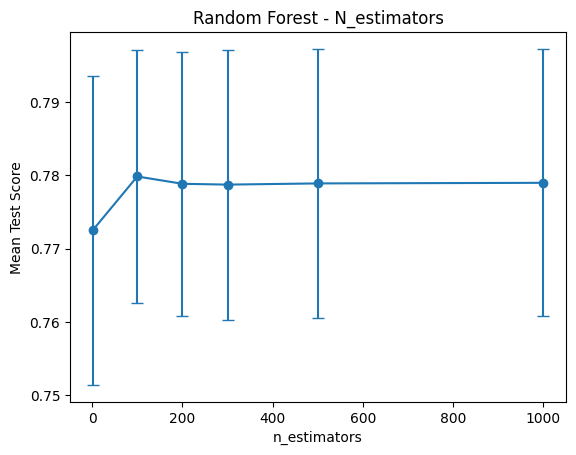

In [ ]:
clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [1, 100, 200, 300, 500, 1000]
}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(Z_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(Z_test)

accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

# Extracting the results from the GridSearchCV object
values = [param['n_estimators'] for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plot the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.title('Random Forest - N_estimators')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'max_depth': 10}
Accuracy:  0.7859704899323388


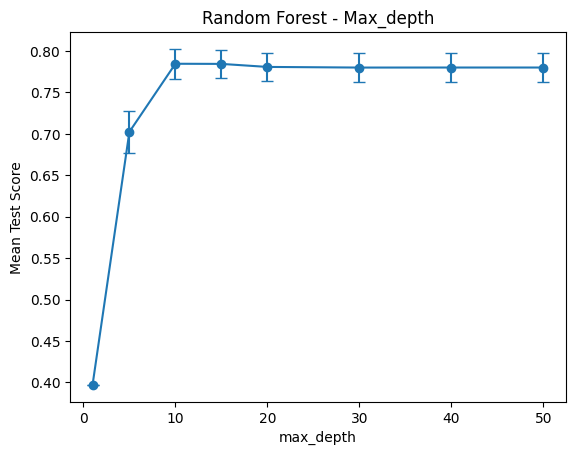

In [ ]:
from sklearn.metrics import accuracy_score

# define the classifier
clf = RandomForestClassifier(random_state=42)

# define the grid of hyperparameters to search
param_grid = {
    'max_depth': [1, 5, 10, 15, 20, 30, 40, 50]
}

# define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(Z_train, y_train)

# get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# predict on the testing data using the best estimator
y_pred = best_clf.predict(Z_test)

# calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

# Extract the results from the GridSearchCV object
values = [param['max_depth'] for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plot the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('Random Forest - Max_depth')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'max_features': 'sqrt'}
Accuracy:  0.7797750061139643


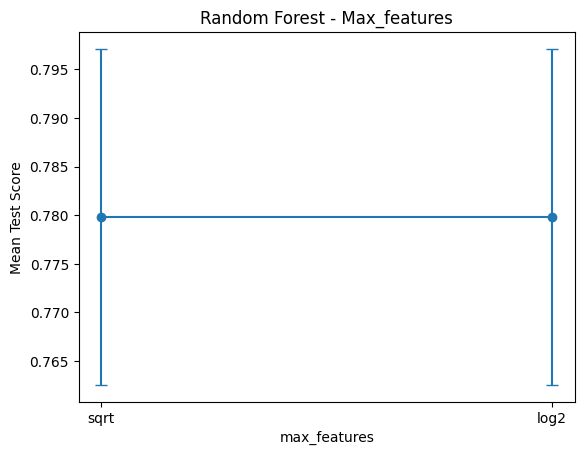

In [ ]:
# define the classifier
clf = RandomForestClassifier(random_state=42)

# define the grid of hyperparameters to search
param_grid = {
    'max_features': ['sqrt', 'log2']
}

# define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(Z_train, y_train)

# get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# predict on the testing data using the best estimator
y_pred = best_clf.predict(Z_test)

# calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

# Extract the results from the GridSearchCV object
values = [param['max_features'] for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plot the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('max_features')
plt.ylabel('Mean Test Score')
plt.title('Random Forest - Max_features')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'min_samples_split': 50}
Accuracy:  0.7756990299176653


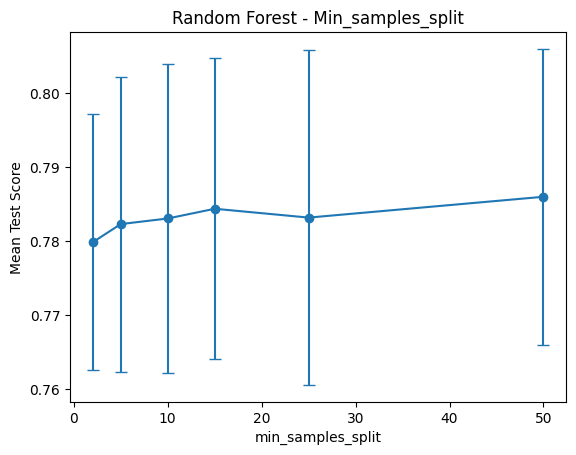

In [ ]:
# define the classifier
clf = RandomForestClassifier(random_state=42)

# define the grid of hyperparameters to search
param_grid = {
    'min_samples_split': [2, 5, 10, 15, 25, 50]
}

# define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(Z_train, y_train)

# get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# predict on the testing data using the best estimator
y_pred = best_clf.predict(Z_test)

# calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

# Extract the results from the GridSearchCV object
values = [param['min_samples_split'] for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plot the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('min_samples_split')
plt.ylabel('Mean Test Score')
plt.title('Random Forest - Min_samples_split')
plt.show()

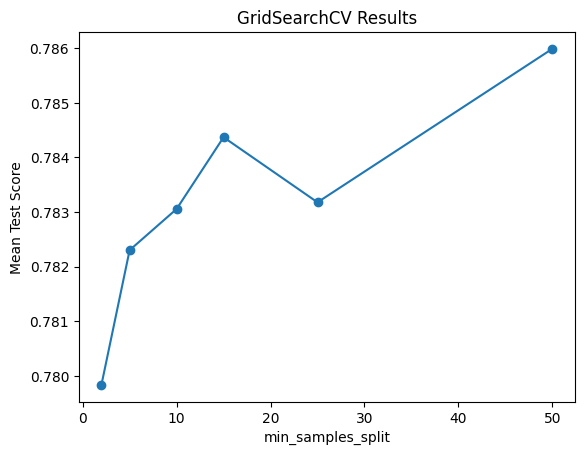

In [ ]:
# Plot the results as a line graph
plt.errorbar(values, scores_mean, fmt='o-', capsize=4)
plt.xlabel('min_samples_split')
plt.ylabel('Mean Test Score')
plt.title('GridSearchCV Results')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'min_samples_leaf': 4}
Accuracy:  0.7798565256378903


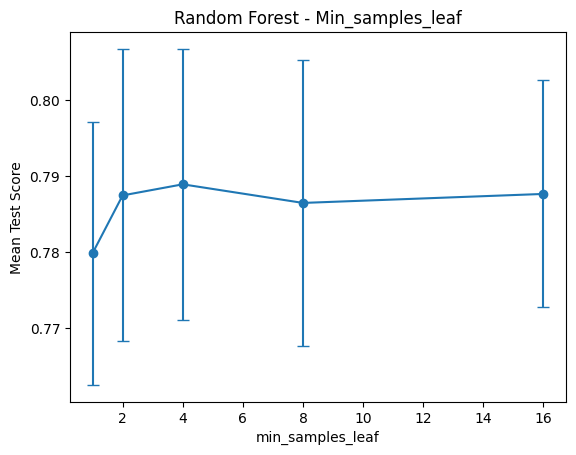

In [ ]:
# define the classifier
clf = RandomForestClassifier(random_state=42)

# define the grid of hyperparameters to search
param_grid = {
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

# define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(Z_train, y_train)

# get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# predict on the testing data using the best estimator
y_pred = best_clf.predict(Z_test)

# calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

# Extract the results from the GridSearchCV object
values = [param['min_samples_leaf'] for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plot the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Test Score')
plt.title('Random Forest - Min_samples_leaf')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'bootstrap': True}
Accuracy:  0.7797750061139643


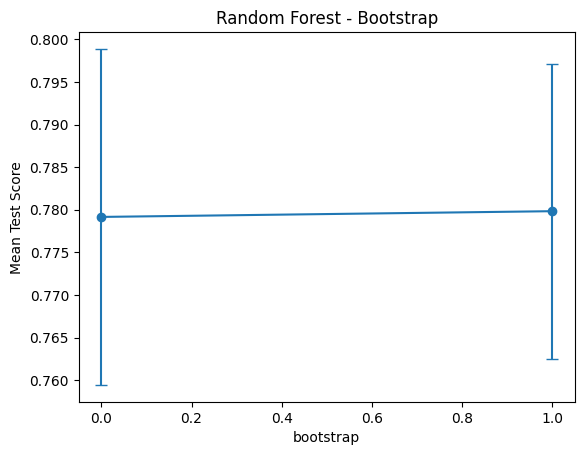

In [ ]:
# define the classifier
clf = RandomForestClassifier(random_state=42)

# define the grid of hyperparameters to search
param_grid = {
    'bootstrap': [True, False]
}

# define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(Z_train, y_train)

# get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# predict on the testing data using the best estimator
y_pred = best_clf.predict(Z_test)

# calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

# Extract the results from the GridSearchCV object
values = [param['bootstrap'] for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plot the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('bootstrap')
plt.ylabel('Mean Test Score')
plt.title('Random Forest - Bootstrap')
plt.show()

In [ ]:
numdf.labels.value_counts().head(10)

1     49662
7     15135
0     13838
2     12753
8      6424
10     4786
11     3260
9      2770
15     2300
18     2232
Name: labels, dtype: int64

In [ ]:
# evaluate random forest algorithm for classification
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Z_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Train the model on the training data
model.fit(Z_train, y_train)

accuracy = model.score(Z_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation accuracy: 0.820 (0.003)
Test accuracy: 0.780
Test accuracy: 0.7558082660797261
Precision: 0.7640923498719197
Recall: 0.7797750061139643
F1 score: 0.7692105667763685


In [ ]:
clf = DecisionTreeClassifier(random_state=42)

# define the grid of hyperparameters to search
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(Z_train, y_train)

# get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# predict on the testing data using the best estimator
y_pred = best_clf.predict(Z_test)

# calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Test accuracy: 0.7680361946686232
Precision: 0.7547849571589992
Recall: 0.7680361946686232
F1 score: 0.7585692746061817


In [ ]:
clf = DecisionTreeClassifier()

# define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(Z_train, y_train)

# get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# predict on the testing data using the best estimator
y_pred = best_clf.predict(Z_test)

# calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)

accuracy = model.score(Z_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 25, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'}
Test accuracy: 0.7558082660797261
Precision: 0.747364778468563
Recall: 0.7587837287030244
F1 score: 0.7496084685156896


In [ ]:
clf = DecisionTreeClassifier(random_state=42)

# define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 8, 16],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(Z_train, y_train)

# get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# predict on the testing data using the best estimator
y_pred = best_clf.predict(Z_test)

# calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print(f"Best training accuracy: {grid_search.cv_results_['mean_test_score'].max()}")

worst_params = grid_search.cv_results_['params'][grid_search.cv_results_['rank_test_score'].min()-1]
print("Worst hyperparameters: ", worst_params)
print(f"Worst accuracy: {grid_search.cv_results_['mean_test_score'].min()}")

print(f"Average accuracy: {grid_search.cv_results_['mean_test_score'].mean()}")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'}
Best training accuracy: 0.7901564171804147
Worst hyperparameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Worst accuracy: 0.0028022621898405255
Average accuracy: 0.5247941491631426
Test accuracy: 0.7572756175103937
Precision: 0.745807363864884
Recall: 0.7572756175103937
F1 score: 0.7481304671461684


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'criterion': 'entropy'}
Accuracy:  0.7655498491888807


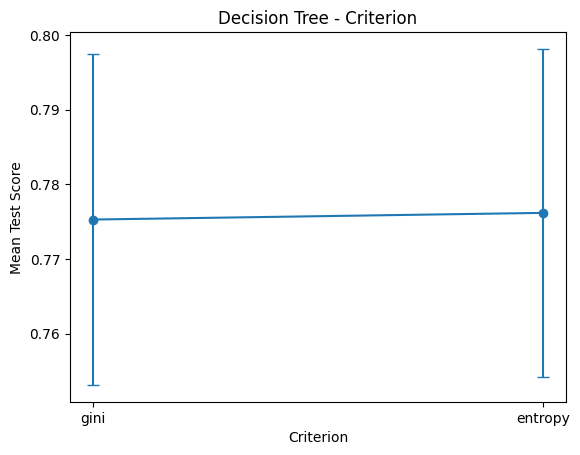

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(Z_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(Z_test)

accuracy = accuracy_score(y_test, y_pred)

# printing the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

values = [param['criterion'] for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plotting the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('Criterion')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree - Criterion')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'splitter': 'random'}
Accuracy:  0.768566071574142


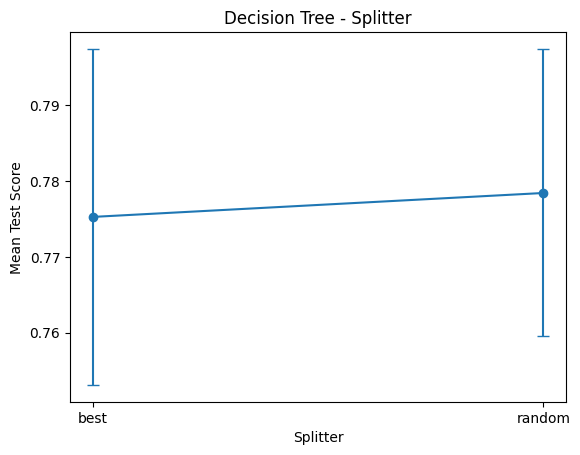

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(Z_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(Z_test)

accuracy = accuracy_score(y_test, y_pred)

# printing the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

values = [param['splitter'] for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plotting the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('Splitter')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree - Splitter')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'max_depth': 15}
Accuracy:  0.7609439960870629


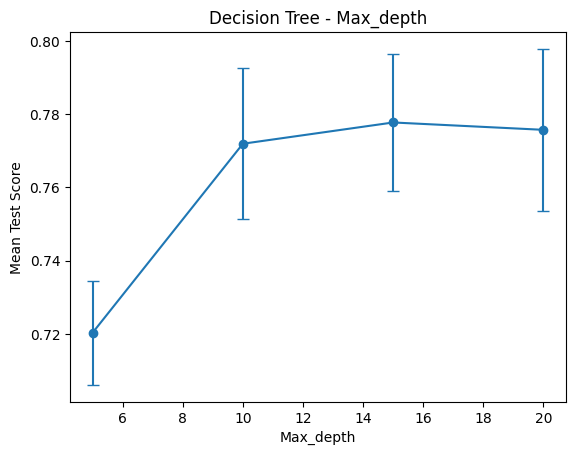

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 10, 15, 20]
}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(Z_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(Z_test)

accuracy = accuracy_score(y_test, y_pred)

# printing the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

values = [param['max_depth'] for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plotting the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('Max_depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree - Max_depth')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'min_samples_split': 50}
Accuracy:  0.744028694872422


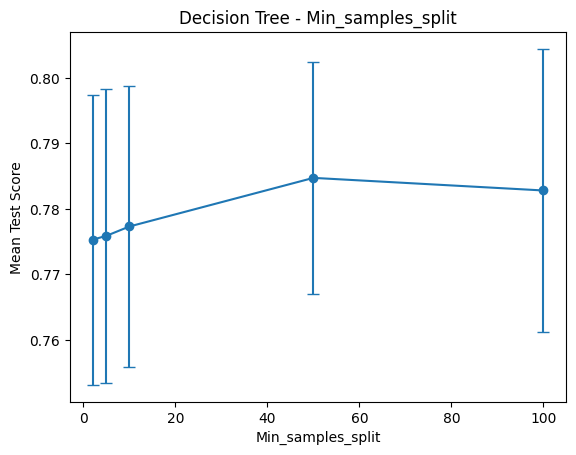

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'min_samples_split': [2, 5, 10, 50, 100]
}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(Z_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(Z_test)

accuracy = accuracy_score(y_test, y_pred)

# printing the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

values = [param['min_samples_split'] for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plotting the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('Min_samples_split')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree - Min_samples_split')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'min_samples_leaf': 8}
Accuracy:  0.7587837287030244


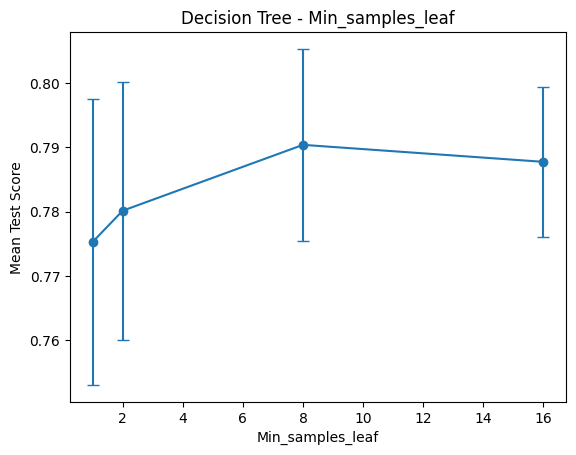

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'min_samples_leaf': [1, 2, 8, 16]
}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(Z_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(Z_test)

accuracy = accuracy_score(y_test, y_pred)

# printing the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

values = [param['min_samples_leaf'] for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plotting the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('Min_samples_leaf')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree - Min_samples_leaf')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'max_features': None}
Accuracy:  0.7589875275128394


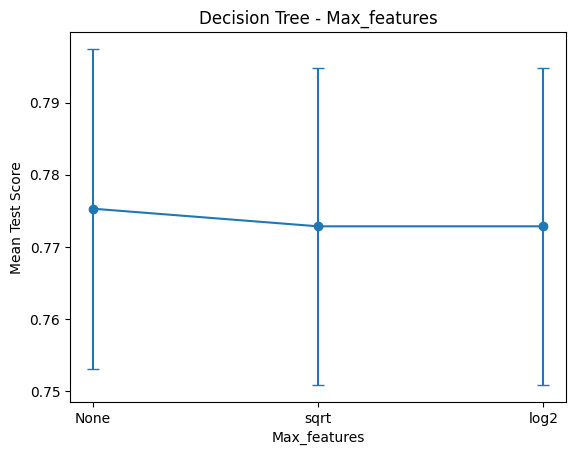

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(Z_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(Z_test)

accuracy = accuracy_score(y_test, y_pred)

# printing the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

values = [str(param['max_features']) if param['max_features'] is not None else 'None'
          for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plotting the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('Max_features')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree - Max_features')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'class_weight': None}
Accuracy:  0.7589875275128394


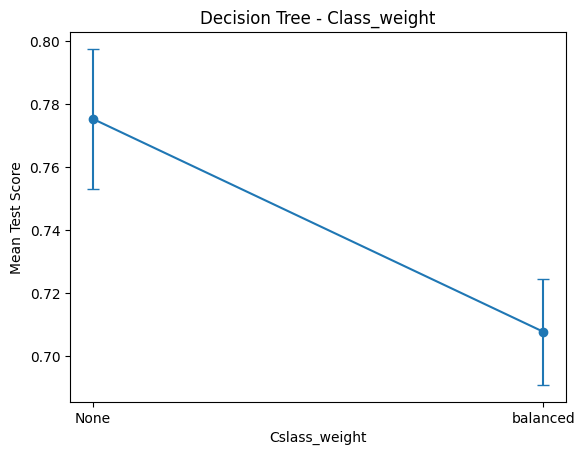

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(Z_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(Z_test)

accuracy = accuracy_score(y_test, y_pred)

# printing the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)

values = [str(param['class_weight']) if param['class_weight'] is not None else 'None'
          for param in grid_search.cv_results_['params']]
scores_mean = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

# Plotting the results as a line graph
plt.errorbar(values, scores_mean, yerr=scores_std, fmt='o-', capsize=4)
plt.xlabel('Cslass_weight')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree - Class_weight')
plt.show()

In [ ]:
cd3 = cd3.fillna(0)

Z_cd3 = cd3.drop(['labels'], axis=1)
y_cd3 = cd3['labels']

eighty = round(cd3.shape[0]*.8)

Z_train_cd3 = cd3[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id']].loc[:eighty]
y_train_cd3 = cd3['labels'].loc[:eighty]

Z_test_cd3 = cd3[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id']].loc[eighty:]
y_test_cd3 = cd3['labels'].loc[eighty:]

In [ ]:
# evaluate random forest algorithm for classification
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Z_train_cd3, y_train_cd3, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Train the model on the training data
model.fit(Z_train_cd3, y_train_cd3)

# Evaluate the model on the testing data and print the accuracy score
accuracy = model.score(Z_test_cd3, y_test_cd3)
print('Test accuracy: %.3f' % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation accuracy: 0.846 (0.023)
Test accuracy: 0.777


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
# evaluate random forest algorithm for classification
model = RandomForestClassifier()

# Define the cross-validation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation and print the mean and standard deviation of the accuracy scores
n_scores = cross_val_score(model, Z_train_cd3, y_train_cd3, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(Z_train_cd3, y_train_cd3)

# Evaluate the model on the testing data and print the accuracy score
accuracy = model.score(Z_test_cd3, y_test_cd3)
print('Test accuracy: %.3f' % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation accuracy: 0.861 (0.020)
Test accuracy: 0.792


In [ ]:
cd9 = cd9.fillna(0)

Z_cd9 = cd9.drop(['labels'], axis=1)
y_cd9 = cd9['labels']

eighty = round(cd9.shape[0]*.8)

Z_train_cd9 = cd9[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id']].loc[:eighty]
y_train_cd9 = cd9['labels'].loc[:eighty]

Z_test_cd9 = cd9[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id']].loc[eighty:]
y_test_cd9 = cd9['labels'].loc[eighty:]

In [ ]:
# evaluate random forest algorithm for classification
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, Z_train_cd9, y_train_cd9, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Train the model on the training data
model.fit(Z_train_cd9, y_train_cd9)

# Evaluate the model on the testing data and print the accuracy score
accuracy = model.score(Z_test_cd9, y_test_cd9)
print('Test accuracy: %.3f' % accuracy)

Cross-validation accuracy: 0.934 (0.011)
Test accuracy: 0.859


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
# evaluate random forest algorithm for classification
model = RandomForestClassifier()

# Define the cross-validation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation and print the mean and standard deviation of the accuracy scores
n_scores = cross_val_score(model, Z_train_cd9, y_train_cd9, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(Z_train_cd9, y_train_cd9)

# Evaluate the model on the testing data and print the accuracy score
accuracy = model.score(Z_test_cd9, y_test_cd9)
print('Test accuracy: %.3f' % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-validation accuracy: 0.933 (0.012)
Test accuracy: 0.875


In [ ]:
clf = DecisionTreeClassifier(random_state=42)

# define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# define the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(Z_train_cd9, y_train_cd9)

# get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# predict on the testing data using the best estimator
y_pred = best_clf.predict(Z_test_cd9)

# calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test_cd9, y_pred)

# print the best hyperparameters and accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Test accuracy: ", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Test accuracy:  0.8611633627550282


In [ ]:
p_train = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id']].loc[:eighty]
y_train = numdf['labels'].loc[:eighty]

p_test = numdf[['test_type_id', 'call_description_id', 'application_id', 'did_id', 'campaign_id', 'fail_reason_id']].loc[eighty:]
y_test = numdf['labels'].loc[eighty:]

model = RandomForestClassifier(bootstrap= True, max_depth= 15, max_features= 'log2', min_samples_leaf= 4, min_samples_split= 5, n_estimators= 200)

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)

n_scores = cross_val_score(model, p_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validation accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Train the model on the training data
model.fit(p_train, y_train)

y_pred = model.predict(Z_test)
accuracy = model.score(Z_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Cross-validation accuracy: 0.815 (0.001)
Test accuracy: 0.7825874296894106
Precision: 0.7526879665773656
Recall: 0.7825874296894106
F1 score: 0.7637464079593477
